# Data, Function, and Library Consolidation

## Import Libraries used in notebook

In [2]:
import pandas as pd # For working with dataframes
import numpy as np # For working with numpy arrays
from sklearn import decomposition # For performing PCA on the data
from sklearn.model_selection import train_test_split #Data splitting
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier for training
import matplotlib.pyplot as plt # For plotting visualizations of analysis
import altair as alt # For additional plotting functionality
import seaborn as sns # Additional scientific programming
import warnings # Suppress warnings from output
from sklearn.multioutput import MultiOutputClassifier #For prediction into multiple categories
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix #Assessing the model
from sklearn.pipeline import Pipeline #Create a pipeline of all of the data processing steps
from tqdm import tqdm  # Import tqdm for progress tracking
import ptitprince as pt # For raincloud plot
from matplotlib_venn import venn3 # Venn Diagram

## Import and look at the snps data for the samples

In [3]:
df = pd.read_csv('matrix_10step.csv')
df

,Unnamed: 0,rs79725552,rs4965019,rs147891127,rs144535625,rs3013006,rs150314208,rs151049930,rs145922255,rs144961645,...,rs186168008,rs76759269,rs182890688,rs148355237,rs189454695,rs145777112,rs191731586,rs141330630,rs201907533,Population code
0,HG00096,0,1,0,0,1,0,0,0,0,...,1,2,0,0,1,0,0,0,0,GBR
1,HG00097,1,1,1,0,0,1,1,1,0,...,1,2,0,0,0,0,0,0,0,GBR
2,HG00099,1,0,1,0,0,1,0,1,0,...,0,2,0,0,0,0,0,0,0,GBR
3,HG00100,0,0,0,0,1,0,0,0,0,...,0,2,0,0,0,0,0,0,0,GBR
4,HG00101,1,0,0,0,1,1,1,1,0,...,1,2,0,0,0,0,0,0,0,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,NA20816,0,0,0,0,1,0,0,0,0,...,0,2,0,0,1,0,0,0,0,TSI
1088,NA20818,0,0,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,TSI
1089,NA20819,0,0,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,TSI
1090,NA20826,0,0,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,TSI


## Provide the appropriate label for the unnamed column --> Samples. The rest of the columns refer to the snps

In [8]:
df.rename(columns={'Unnamed: 0': 'Sample'}, inplace=True) #The columns correspond to the specific snp that is present (1) or absent (0)
df.head()

,Sample,rs79725552,rs4965019,rs147891127,rs144535625,rs3013006,rs150314208,rs151049930,rs145922255,rs144961645,...,rs186168008,rs76759269,rs182890688,rs148355237,rs189454695,rs145777112,rs191731586,rs141330630,rs201907533,Population code
0,HG00096,0,1,0,0,1,0,0,0,0,...,1,2,0,0,1,0,0,0,0,GBR
1,HG00097,1,1,1,0,0,1,1,1,0,...,1,2,0,0,0,0,0,0,0,GBR
2,HG00099,1,0,1,0,0,1,0,1,0,...,0,2,0,0,0,0,0,0,0,GBR
3,HG00100,0,0,0,0,1,0,0,0,0,...,0,2,0,0,0,0,0,0,0,GBR
4,HG00101,1,0,0,0,1,1,1,1,0,...,1,2,0,0,0,0,0,0,0,GBR


## Which columns don't correspond to a known snp that starts with 'rs'
### The prefix "rs" of a SNP (Single Nucleotide Polymorphism) identifier stands for "Reference SNP". The "rs" identifier is a unique number assigned to each SNP that has been cataloged in the dbSNP database, which is maintained by the National Center for Biotechnology Information (NCBI).

### Characteristics of rs Identifiers

**Cataloging Genetic Variants**: 

"rs" numbers serve as unique identifiers for SNPs and other variants in genomic databases, primarily dbSNP. Each "rs" number corresponds to a specific variant that has been studied and annotated.

**Common Usage in Publications**:

Researchers often use "rs" identifiers in scientific literature to reference specific SNPs without ambiguity. This standardized nomenclature facilitates communication about genetic variants across studies.

**Linking to Genomic Data**:

rs identifiers are used in genome-wide association studies (GWAS), pharmacogenomics, and other genetic studies to associate specific SNPs with phenotypes, traits, diseases, or drug responses.

## SNPs that start with 'esv' are known as esequence variants or Variant IDs. The 'esv' prefix typically indicates that these are "variant" identifiers originating from databases like the dbSNP or the 1000 Genomes Project.

### Characteristics of ESVs:

**Variant Type**: ESVs can represent a variety of genomic variants, including SNPs (single nucleotide polymorphisms), insertions, deletions, and larger structural variants.

**Identification**: The 'esv' prefix is commonly used specifically for structural and functional variants, differentiating them from traditional SNP IDs which typically start with 'rs'.

**Database Reference**: These identifiers are usually referenced in population genetics databases and are used in genomic studies for linking phenotype data to genetic information. They help provide unique identification for variants that have been characterized in various studies.

In [9]:
non_rs_columns = [col for col in df.columns if not col.startswith('rs')]
non_rs_columns.remove('Sample')
# Print the non-matching column names
print("Columns that do not follow the format 'rs%':")
print(non_rs_columns)

Columns that do not follow the format 'rs%':
['Unnamed: 300', 'Unnamed: 317', 'esv2673573', 'esv2677375', 'esv2669345', 'esv2673622', 'Unnamed: 1941', 'Unnamed: 2575', 'Unnamed: 3467', 'Unnamed: 5004', 'Unnamed: 5682', 'esv2667826', 'Unnamed: 6100', 'Unnamed: 6747', 'esv2658046', 'esv2674072', 'Unnamed: 7765', 'Unnamed: 7962', 'esv2658091', 'esv2677625', 'Unnamed: 8800', 'Unnamed: 9097', 'Unnamed: 9402', 'Unnamed: 10166', 'Unnamed: 10260', 'Unnamed: 10341', 'esv2678940', 'Unnamed: 10587', 'Unnamed: 11079', 'esv2662756', 'Unnamed: 12124', 'Unnamed: 12891', 'Unnamed: 13545', 'Unnamed: 13971', 'esv2666282', 'esv2662174', 'Unnamed: 15501', 'Unnamed: 15774', 'Unnamed: 16222', 'Unnamed: 17479', 'Unnamed: 17947', 'Unnamed: 18412', 'Unnamed: 18614', 'Unnamed: 18753', 'Unnamed: 19049', 'Unnamed: 19184', 'Unnamed: 20122', 'Unnamed: 20199', 'Unnamed: 20994', 'Unnamed: 21352', 'esv2666744', 'esv2678147', 'Unnamed: 23102', 'esv2663096', 'esv2663104', 'esv2672093', 'Unnamed: 27884', 'Unnamed: 28109'

## Import population data

In [10]:
pop_df = pd.read_csv('igsr_populations.tsv', sep='\t')
print(f'Size of df: {pop_df.shape}')
pop_df.head()

Size of df: (212, 11)


,Population code,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Data collections
0,CHS,CHS,Southern Han Chinese,Han Chinese South,23.13333,113.266667,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,KHV,KHV,Kinh Vietnamese,"Kinh in Ho Chi Minh City, Vietnam",10.78000,106.680000,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,NaN,BrahminSGDP,Brahmin,Brahmin in India (SGDP),17.70000,83.300000,NaN,South Asia (SGDP),#008c1e,18,Simons Genome Diversity Project
3,NaN,MiaoSGDP,Miao,Miao in China (SGDP),28.00000,109.000000,NaN,East Asia (SGDP),#ff48de,16,Simons Genome Diversity Project
4,NaN,KyrgyzSGDP,Kyrgyz,Kyrgyz in Kyrgyzystan (SGDP),42.90000,74.600000,NaN,Central Asia and Siberia (SGDP),#01daa0,15,Simons Genome Diversity Project


## Separate data into training. validation and test sets

In [27]:
train_set, testing_set = train_test_split(df, test_size = 0.3, stratify = df['Population code'], random_state=42) #Specify split state
validation_test, test_set = train_test_split(testing_set, test_size = 0.5, stratify = testing_set['Population code'])
print(train_set.shape)
train_set.head()

(764, 49434)


,Sample,rs79725552,rs4965019,rs147891127,rs144535625,rs3013006,rs150314208,rs151049930,rs145922255,rs144961645,...,rs186168008,rs76759269,rs182890688,rs148355237,rs189454695,rs145777112,rs191731586,rs141330630,rs201907533,Population code
427,NA11843,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,CEU
633,NA18939,1,1,1,0,0,0,0,1,0,...,1,2,0,0,1,0,0,0,0,JPT
863,NA19471,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,LWK
540,NA18557,0,0,0,0,2,0,0,0,0,...,0,2,0,0,1,0,0,0,0,CHB
996,NA20504,0,0,0,0,1,0,0,0,0,...,0,2,0,0,0,0,0,0,0,TSI


# Data Processing Steps

## Add the demographical data

In [28]:
train_set = train_set.merge(pop_df, on='Population code', how='inner') # Merge the demographical data  to the df with principal component values
print(f'Size of df: {train_set.shape}')
train_set.head()

Size of df: (764, 49444)


,Sample,rs79725552,rs4965019,rs147891127,rs144535625,rs3013006,rs150314208,rs151049930,rs145922255,rs144961645,...,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Data collections
0,NA11843,0,0,0,0,0,0,0,0,0,...,CEU,CEPH,Utah residents (CEPH) with Northern and Wester...,40.767000,-111.890400,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,NA18939,1,1,1,0,0,0,0,1,0,...,JPT,Japanese,"Japanese in Tokyo, Japan",35.680000,139.680000,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,NA19471,0,0,0,0,0,0,0,0,0,...,LWK,Luhya,"Luhya in Webuye, Kenya",-1.270000,36.610000,AFR,African Ancestry,#ffd845,1,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,NA18557,0,0,0,0,2,0,0,0,0,...,CHB,Han Chinese,"Han Chinese in Beijing, China",39.916666,116.383333,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,NA20504,0,0,0,0,1,0,0,0,0,...,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


## Separate the categorical and numerical data

In [29]:
# Select all numerical columns
snps_df = train_set.select_dtypes(include=['number'])
meta_df = train_set.select_dtypes(exclude=['number'])
print(snps_df.shape)
meta_df.head()

(764, 49435)


,Sample,Population code,Population elastic ID,Population name,Population description,Superpopulation code,Superpopulation name,Superpopulation display colour,Data collections
0,NA11843,CEU,CEU,CEPH,Utah residents (CEPH) with Northern and Wester...,EUR,European Ancestry,#018ead,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,NA18939,JPT,JPT,Japanese,"Japanese in Tokyo, Japan",EAS,East Asian Ancestry,#778500,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,NA19471,LWK,LWK,Luhya,"Luhya in Webuye, Kenya",AFR,African Ancestry,#ffd845,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,NA18557,CHB,CHB,Han Chinese,"Han Chinese in Beijing, China",EAS,East Asian Ancestry,#778500,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,NA20504,TSI,TSI,Toscani,Toscani in Italy,EUR,European Ancestry,#018ead,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


## Create Dummies for the Superpopulation categories using One-Hot Encoding

In [31]:
meta_df = pd.get_dummies(meta_df, columns=['Superpopulation name'])

In [32]:
meta_df.head()

,Sample,Population code,Population elastic ID,Population name,Population description,Superpopulation code,Superpopulation display colour,Data collections,Superpopulation name_African Ancestry,Superpopulation name_American Ancestry,Superpopulation name_East Asian Ancestry,Superpopulation name_European Ancestry
0,NA11843,CEU,CEU,CEPH,Utah residents (CEPH) with Northern and Wester...,EUR,#018ead,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",False,False,False,True
1,NA18939,JPT,JPT,Japanese,"Japanese in Tokyo, Japan",EAS,#778500,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",False,False,True,False
2,NA19471,LWK,LWK,Luhya,"Luhya in Webuye, Kenya",AFR,#ffd845,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",True,False,False,False
3,NA18557,CHB,CHB,Han Chinese,"Han Chinese in Beijing, China",EAS,#778500,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",False,False,True,False
4,NA20504,TSI,TSI,Toscani,Toscani in Italy,EUR,#018ead,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",False,False,False,True


## Define X_train and y_train

In [33]:
X_train = snps_df.drop(['Population latitude','Population longitude','Superpopulation display order'], axis = 1)
X_train

,rs79725552,rs4965019,rs147891127,rs144535625,rs3013006,rs150314208,rs151049930,rs145922255,rs144961645,rs144366698,...,rs6010087,rs186168008,rs76759269,rs182890688,rs148355237,rs189454695,rs145777112,rs191731586,rs141330630,rs201907533
0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,1,0,0,...,0,1,2,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,0,0,0,0,0,0,0,0,0,0,...,0,1,2,0,0,0,0,0,0,1
760,0,0,0,0,1,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
761,0,0,0,0,2,0,0,0,0,0,...,0,0,2,0,0,1,0,0,1,0
762,0,0,0,0,1,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0


In [34]:
y_train = meta_df[['Superpopulation name_African Ancestry', 'Superpopulation name_American Ancestry', 'Superpopulation name_East Asian Ancestry', 'Superpopulation name_European Ancestry']]
y_train

,Superpopulation name_African Ancestry,Superpopulation name_American Ancestry,Superpopulation name_East Asian Ancestry,Superpopulation name_European Ancestry
0,False,False,False,True
1,False,False,True,False
2,True,False,False,False
3,False,False,True,False
4,False,False,False,True
...,...,...,...,...
759,True,False,False,False
760,False,True,False,False
761,False,False,True,False
762,False,True,False,False


## Validation Set

In [40]:
validation_set = validation_test.merge(pop_df, on='Population code', how='inner') 

X_val = validation_set.select_dtypes(include=['number']).drop(columns=['Population latitude','Population longitude','Superpopulation display order'])
y_val = pd.get_dummies(validation_set['Superpopulation name'])

# Create models for training and fit it to the data

## Fine-tuning the number of parameters for the model
1. n_estimators

Definition: The n_estimators parameter specifies the number of trees in the forest. Each tree is trained independently on a random subset of the data and a random subset of features.

Effect:
Higher Values: Increasing the number of trees generally improves model performance because the model can capture more complex patterns in the data. However, after a certain point, the improvement may diminish (law of diminishing returns).

Lower Values: A smaller number of trees can lead to a less robust model, which may underfit the data.

Default Value: The default value of n_estimators in scikit-learn’s RandomForestClassifier is typically set to 100.

2. max_depth

Definition: The max_depth parameter determines the maximum depth of each tree in the forest. This depth refers to the number of splits or levels in a tree.

Effect:
Higher Values: Allowing deeper trees can lead to a more complex model that may fit the training data very well. However, this increases the risk of overfitting, where the model captures noise in the training data rather than generalizing to unseen data.

Lower Values: A smaller maximum depth can prevent overfitting and create a more generalized model, but can also lead to underfitting if the trees are too simple to capture the underlying data structure.
Default Value: The default value for max_depth is None, which means that nodes are expanded until all leaves are pure or contain fewer than the minimum samples required to split a node.

Summary

Choosing n_estimators:

Generally, higher values (like 100 or more) are used to ensure robustness, but the optimal number can depend on the specific dataset. It is common to perform cross-validation to determine the best n_estimators.

Choosing max_depth:

The ideal value of max_depth can vary widely based on the nature of the data. You may use techniques such as grid search or randomized search for hyperparameter tuning to find a suitable value.

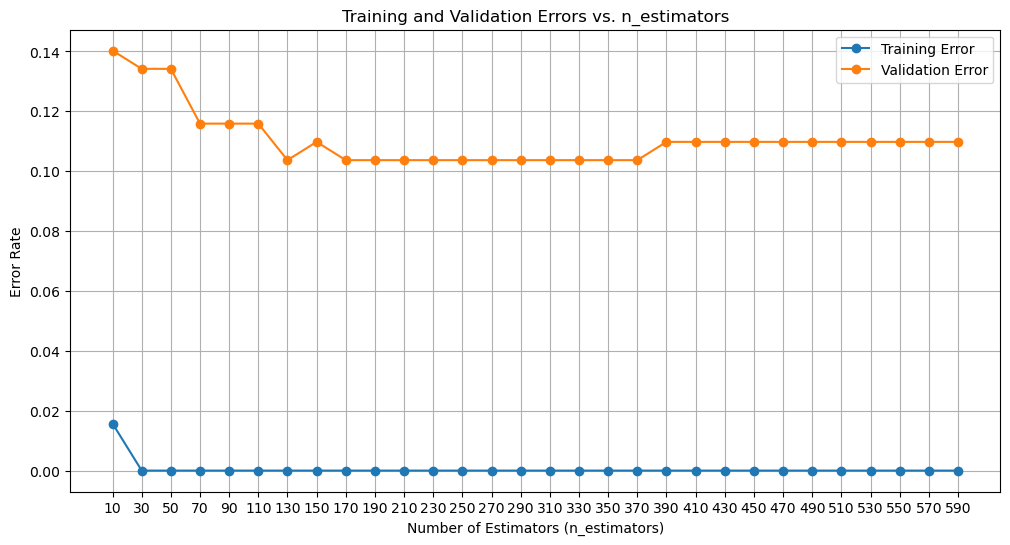

In [39]:
# Define ranges for n_estimators
n_estimators_range = range(10, 601, 20)  # E.g., from 10 to 600 trees

# Initialize lists to store errors
train_errors = []
val_errors = []

# Fine-tune n_estimators
for n in n_estimators_range:
    rfclass = RandomForestClassifier(n_estimators=n, random_state=42)
    model = MultiOutputClassifier(rfclass)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on training data
    train_preds = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_preds)
    train_errors.append(1 - train_accuracy)  # Store the training error (1 - accuracy)
    
    # Predict on validation data
    val_preds = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_preds)
    val_errors.append(1 - val_accuracy)  # Store the validation error (1 - accuracy)

# Plot training and validation errors
plt.figure(figsize=(12, 6))
plt.plot(n_estimators_range, train_errors, label='Training Error', marker='o')
plt.plot(n_estimators_range, val_errors, label='Validation Error', marker='o')
plt.title('Training and Validation Errors vs. n_estimators')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Error Rate')
plt.legend()
plt.grid()
plt.xticks(n_estimators_range)  # Ensure every tick to be shown
plt.show()

## Choosing the best n_estimator value

In [46]:
rfclass = RandomForestClassifier(n_estimators=170) # n_estimators=100,max_features='sqrt',max_depth=None,min_samples_split=2,min_samples_leaf=1,bootstrap=True,random_state=42,class_weight='balanced'
rfclass

RandomForestClassifier(n_estimators=170)

## Wrap it in MultiOutputClassifier for multi-label classification and __TRAIN__ the Model

In [47]:
model = MultiOutputClassifier(rfclass)

# Train the model
model.fit(X_train, y_train)


MultiOutputClassifier(estimator=RandomForestClassifier(n_estimators=170))

# Model Assessment

## ASSESS: Confusion Matrix and Accuracy on the Training Set

In [48]:
y_pred_train = model.predict(X_train)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_train, y_pred_train))

# Calculate accuracy if needed
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Overall Accuracy: {accuracy_train:.4f}")

# Print the confusion matrix for each target variable
print("\nConfusion Matrix (Training Set):")
for i, col in enumerate(y_train.columns):
    cm = confusion_matrix(y_train.iloc[:, i], y_pred_train[:, i])
    print(f"Confusion Matrix for {col}:\n{cm}\n")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       126
           2       1.00      1.00      1.00       200
           3       1.00      1.00      1.00       265

   micro avg       1.00      1.00      1.00       764
   macro avg       1.00      1.00      1.00       764
weighted avg       1.00      1.00      1.00       764
 samples avg       1.00      1.00      1.00       764

Overall Accuracy: 1.0000

Confusion Matrix (Training Set):
Confusion Matrix for Superpopulation name_African Ancestry:
[[591   0]
 [  0 173]]

Confusion Matrix for Superpopulation name_American Ancestry:
[[638   0]
 [  0 126]]

Confusion Matrix for Superpopulation name_East Asian Ancestry:
[[564   0]
 [  0 200]]

Confusion Matrix for Superpopulation name_European Ancestry:
[[499   0]
 [  0 265]]



# Process the Validation Data

In [49]:
validation_set = validation_test.merge(pop_df, on='Population code', how='inner') 

X_val = validation_set.select_dtypes(include=['number']).drop(columns=['Population latitude','Population longitude','Superpopulation display order'])
y_val = pd.get_dummies(validation_set['Superpopulation name'])

# Make predictions on X_val
y_pred = model.predict(X_val)

In [50]:
print(y_val.shape)
print(y_pred.shape)

(164, 4)
(164, 4)


# ASSESS: Confusion Matrix and Accuracy on the Validation Set
## - Lower accuracy on the validation set --> Overfitting

In [51]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Calculate accuracy if needed
accuracy = accuracy_score(y_val, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        36
           1       1.00      0.37      0.54        27
           2       1.00      1.00      1.00        44
           3       0.89      1.00      0.94        57

   micro avg       0.94      0.89      0.91       164
   macro avg       0.95      0.84      0.86       164
weighted avg       0.94      0.89      0.89       164
 samples avg       0.89      0.89      0.89       164

Overall Accuracy: 0.8902


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### There's high variance (train accuracy > val accuracy) which indicates overfitting. 
#### I suspect that there may be overfitting to the data to separate the overlaps of American and European ancestory as seen in previous PCA analysis
### **REMOVE** American samples and ASSESS using same model predictions (no retraining or recalculations)
#### --> 97-99% accuracy on non-American samples! (depending on random seed)

In [18]:
y_pred_df = pd.DataFrame(y_pred, columns = ['African Ancestry', 'American Ancestry', 'East Asian Ancestry','European Ancestry'])

In [19]:
y_val_no_murica = y_val[y_val['American Ancestry']==False]

# Get the indices of y_val where 'American Ancestry' is True
indices_to_remove = y_val.index[y_val['American Ancestry']].tolist()

# Remove the same indices from y_pred_df
y_pred_no_murica = y_pred_df.drop(index=indices_to_remove)

In [20]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_val_no_murica, y_pred_no_murica))

# Calculate accuracy if needed
accuracy = accuracy_score(y_val_no_murica, y_pred_no_murica)
print(f"Overall Accuracy: {accuracy:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        57

   micro avg       0.99      0.99      0.99       137
   macro avg       0.75      0.74      0.75       137
weighted avg       1.00      0.99      1.00       137
 samples avg       0.99      0.99      0.99       137

Overall Accuracy: 0.9927


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# CREATE and TRAIN Another Model Without American Samples

In [21]:
train_set_no_murica = train_set[train_set['Superpopulation name']!='American Ancestry']

In [22]:
snps_nm_df = train_set_no_murica.select_dtypes(include=['number'])
meta_nm_df = train_set_no_murica.select_dtypes(exclude=['number'])
meta_nm_df = pd.get_dummies(meta_nm_df, columns=['Superpopulation name'])

In [23]:
X_train_no_murica = snps_nm_df.drop(['Population latitude','Population longitude','Superpopulation display order'], axis = 1)
y_train_no_murica = meta_nm_df[['Superpopulation name_African Ancestry', 'Superpopulation name_East Asian Ancestry', 'Superpopulation name_European Ancestry']]

rfclass_2 = RandomForestClassifier() # n_estimators=100,max_features='sqrt',max_depth=None,min_samples_split=2,min_samples_leaf=1,bootstrap=True,random_state=42,class_weight='balanced'
model_2 = MultiOutputClassifier(rfclass_2)

# Train the model
model_2.fit(X_train_no_murica, y_train_no_murica)

MultiOutputClassifier(estimator=RandomForestClassifier())

## Perfect Accuracy on the Training Data (Again)

In [25]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_train_no_murica, y_pred_train_no_murica))

# Calculate accuracy if needed
accuracy_train = accuracy_score(y_train_no_murica, y_pred_train_no_murica)
print(f"Overall Accuracy: {accuracy_train:.4f}")

# Print the confusion matrix for each target variable
print("\nConfusion Matrix (Training Set):")
for i, col in enumerate(y_train_no_murica.columns):
    cm = confusion_matrix(y_train_no_murica.iloc[:, i], y_pred_train_no_murica[:, i])
    print(f"Confusion Matrix for {col}:\n{cm}\n")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       200
           2       1.00      1.00      1.00       265

   micro avg       1.00      1.00      1.00       638
   macro avg       1.00      1.00      1.00       638
weighted avg       1.00      1.00      1.00       638
 samples avg       1.00      1.00      1.00       638

Overall Accuracy: 1.0000

Confusion Matrix (Training Set):
Confusion Matrix for Superpopulation name_African Ancestry:
[[465   0]
 [  0 173]]

Confusion Matrix for Superpopulation name_East Asian Ancestry:
[[438   0]
 [  0 200]]

Confusion Matrix for Superpopulation name_European Ancestry:
[[373   0]
 [  0 265]]



## ASSESS Against the Validation Set --> ~98% accuracy! It's likely that the issue was overfitting to the train-set differences between the American and European superpopulations!
### Looking into how companies like 23&me predict genetic ancestory, they have reference genotype profiles for ancestry populations that samples are sorted into. It makes sense that these would be distinct populations with a degree of genetic separation because they're from different genetic pools. Here, 'American' ancestory is still largely coinciding with European ancestory instead of a native gene pool.

### More details on 23&me's process:
- The extracted DNA goes through a genotyping process, where specific regions of the genome are analyzed.
- Instead of sequencing the entire genome, 23andMe focuses on known single nucleotide polymorphisms (SNPs). These are variations at specific positions in the DNA sequence that can be associated with certain traits or ancestry information.
- The high-throughput genotyping technologies, like microarrays, allow for the simultaneous analysis of hundreds of thousands to millions of SNPs in a single test.
### Data Processing and Analysis
- Ancestry Composition: The SNP data is compared against reference populations to determine ancestry. Algorithms use large databases of genetic information from diverse populations to estimate geographic ancestry proportions (e.g., European, African, Asian).
- Phasing and Imputation: This involves determining which SNPs are inherited together and can fill in missing genetic information based on known haplotypes from reference genomes.
- Health Features: 23andMe also analyzes the SNPs associated with specific traits, such as susceptibility to certain conditions, carrier status for genetic disorders, and direct-to-consumer health traits. Predictive algorithms might assess risk based on genetic predispositions.

In [26]:
validation_set_no_murica = validation_set[validation_set['Superpopulation name']!='American Ancestry']

X_val_nm = validation_set_no_murica.select_dtypes(include=['number']).drop(columns=['Population latitude','Population longitude','Superpopulation display order'])
y_val_nm = pd.get_dummies(validation_set_no_murica['Superpopulation name'])



In [27]:
# Make predictions on X_val
y_pred_nm = model_2.predict(X_val_nm)

In [28]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_val_nm, y_pred_nm))

# Calculate accuracy if needed
accuracy_nm = accuracy_score(y_val_nm, y_pred_nm)
print(f"Overall Accuracy: {accuracy_nm:.4f}")

# Print the confusion matrix for each target variable
print("\nConfusion Matrix (Training Set):")
for i, col in enumerate(y_val_nm.columns):
    cm = confusion_matrix(y_val_nm.iloc[:, i], y_pred_nm[:, i])
    print(f"Confusion Matrix for {col}:\n{cm}\n")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       1.00      1.00      1.00        43
           2       0.98      1.00      0.99        57

   micro avg       0.99      0.99      0.99       137
   macro avg       0.99      0.99      0.99       137
weighted avg       0.99      0.99      0.99       137
 samples avg       0.99      0.99      0.99       137

Overall Accuracy: 0.9927

Confusion Matrix (Training Set):
Confusion Matrix for African Ancestry:
[[100   0]
 [  1  36]]

Confusion Matrix for East Asian Ancestry:
[[94  0]
 [ 0 43]]

Confusion Matrix for European Ancestry:
[[79  1]
 [ 0 57]]



# ADD Model_1 and Model_2 predictions to the DataFrames

# IDEA: Which snps are strong indicators of genotype? Identify. Do they coincide with biggest contributors to the principal components?

In [29]:
# Dictionary to store importance DataFrames
importance_dataframes = {}

# Step to retrieve feature importance for each target with progress tracking
for i, (col_name, estimator) in tqdm(enumerate(zip(y_train_no_murica.columns, model_2.estimators_)), total=len(y_train_no_murica.columns), desc='Processing Columns'):
    importances = estimator.feature_importances_
    
    # Create a DataFrame for feature importance
    importance_df = pd.DataFrame({
        'Feature': X_train_no_murica.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Store the DataFrame in the dictionary with the column name
    importance_dataframes[col_name] = importance_df

    # Print feature importances for the current output variable
    print(f"\nFeature Importances for {col_name}:")
    print(importance_df)

Processing Columns: 100%|█████████████████████████| 3/3 [00:00<00:00, 44.93it/s]


Feature Importances for Superpopulation name_African Ancestry:
           Feature  Importance
25532    rs7410699    0.022901
41358    rs9627422    0.017237
27652   rs12160281    0.013758
9271     rs7288727    0.013556
40964    rs9626905    0.012601
...            ...         ...
16646  rs140414380    0.000000
16647  rs116258689    0.000000
16648   rs66471734    0.000000
16649   rs35017742    0.000000
49431  rs201907533    0.000000

[49432 rows x 2 columns]

Feature Importances for Superpopulation name_East Asian Ancestry:
           Feature  Importance
36232   rs72619546    0.017030
21586   rs13053846    0.011022
35244    rs5758754    0.011010
27407    rs2277843    0.010978
5036     rs5758363    0.010589
...            ...         ...
16764  rs144296589    0.000000
16765  rs140662354    0.000000
16767  rs146662737    0.000000
16768  rs186507587    0.000000
49431  rs201907533    0.000000

[49432 rows x 2 columns]

Feature Importances for Superpopulation name_European Ancestry:
        

In [30]:
print(importance_dataframes.keys())

dict_keys(['Superpopulation name_African Ancestry', 'Superpopulation name_East Asian Ancestry', 'Superpopulation name_European Ancestry'])


## Let's visualize to see if the distinguishing snps are different for the different populations!

In [32]:
# Convert to DataFrames
df_african = importance_dataframes['Superpopulation name_African Ancestry']
df_african['Category'] = 'African Ancestry'

df_eastern = importance_dataframes['Superpopulation name_East Asian Ancestry']
df_eastern['Category'] = 'East Asian Ancestry'

df_european = importance_dataframes['Superpopulation name_European Ancestry']
df_european['Category'] = 'European Ancestry'

# Combine all DataFrames
combined_importances = pd.concat([df_african, df_eastern, df_european])

# Set the order of categories for plotting
combined_importances['Category'] = pd.Categorical(combined_importances['Category'], 
                                                  categories=['African Ancestry', 'East Asian Ancestry', 'European Ancestry'],
                                                  ordered=True)

In [70]:
df_african.keys()

Index(['Feature', 'Importance', 'Category', 'loci'], dtype='object')

## Venn Diagram of overlap of the important alleles between groups
### The lack of overlap is expected because these are the alleles that best help distinguish these populations. Whether or not I've found something significant needs to be validated with biological knowledge.
### - Are these snps known to be markers of ancestory?
### - Have I identified any new potential markers?
### - Has this analysis missed any important markers that make the results suspicious?

# OR AM I INTERPRETTING THIS WRONG. I haven't looked at presence / absence or frequencies of snps in populations

In [90]:
african_imp_alleles =  df_african[df_african['Importance']>0.001]
eastern_imp_alleles =  df_eastern[df_eastern['Importance']>0.001]
european_imp_alleles =  df_european[df_european['Importance']>0.001]
print(african_imp_alleles.shape)
print(eastern_imp_alleles.shape)
print(european_imp_alleles.shape)

(218, 4)
(229, 4)
(218, 4)


### Importance > 0.001

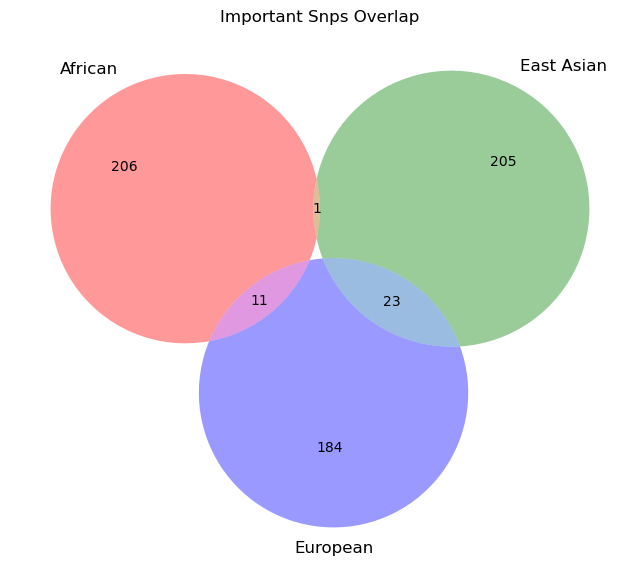

In [97]:
# Create a Venn diagram for the sets
plt.figure(figsize=(8, 8))
#venn3([set_coverage,set_coverage_fail, set_CNV_calling, set_CNV_calling_fail, set_passed_well, set_passed_well_fail], ('Coverage','Coverage Fail', 'CNV Calling','CNV Calling Fail', 'Passed Well', 'Passed Well Fail'))
#venn3([set_coverage, set_coverage_fail], ('Coverage','Coverage Fail'))
venn3([set(african_imp_alleles.index),set(eastern_imp_alleles.index),set(european_imp_alleles.index)], ('African','East Asian', 'European'))
# Set title and show the plot
plt.title('Important Snps Overlap')
plt.show()

(array([49., 24., 16., 12., 20.,  7., 22.,  9.,  9., 11.,  4.,  8.,  3.,
         5.,  4.,  2.,  0.,  2.,  0.,  2.,  1.,  1.,  1.,  1.,  0.,  0.,
         1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.00102723, 0.00146471, 0.00190219, 0.00233967, 0.00277715,
        0.00321463, 0.00365211, 0.00408959, 0.00452707, 0.00496455,
        0.00540203, 0.00583951, 0.00627699, 0.00671448, 0.00715196,
        0.00758944, 0.00802692, 0.0084644 , 0.00890188, 0.00933936,
        0.00977684, 0.01021432, 0.0106518 , 0.01108928, 0.01152676,
        0.01196424, 0.01240172, 0.0128392 , 0.01327668, 0.01371416,
        0.01415164, 0.01458912, 0.01502661, 0.01546409, 0.01590157,
        0.01633905, 0.01677653, 0.01721401, 0.01765149, 0.01808897,
        0.01852645, 0.01896393, 0.01940141, 0.01983889, 0.02027637,
        0.02071385, 0.02115133, 0.02158881, 0.02202629, 0.02246377,
        0.02290125]),
 <BarContainer

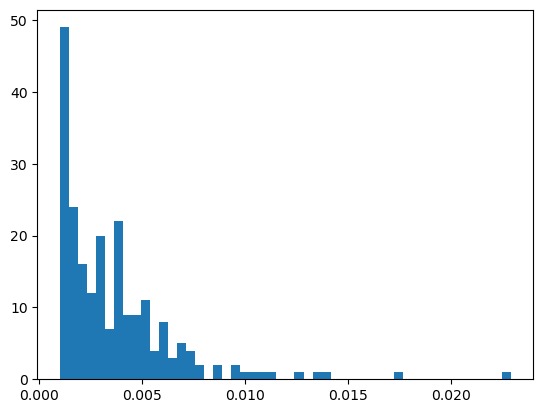

In [126]:
plt.hist(african_imp_alleles['Importance'], bins = 50)

### Importance < 0.001 >0.0001

In [103]:
african_less_imp_alleles =  df_african[(df_african['Importance']<0.001) & (df_african['Importance']>0.0001)]
eastern_less_imp_alleles =  df_eastern[(df_eastern['Importance']<0.001) & (df_eastern['Importance']>0.0001)]
european_less_imp_alleles =  df_european[(df_european['Importance']<0.001) & (df_european['Importance']>0.0001)]
print(african_less_imp_alleles.shape)
print(eastern_less_imp_alleles.shape)
print(european_less_imp_alleles.shape)

(493, 4)
(837, 4)
(1194, 4)


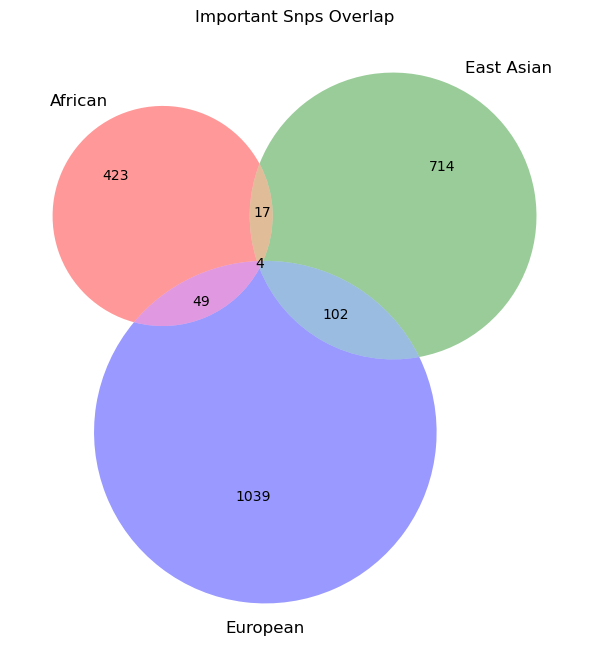

In [104]:
# Create a Venn diagram for the sets
plt.figure(figsize=(8, 8))
#venn3([set_coverage,set_coverage_fail, set_CNV_calling, set_CNV_calling_fail, set_passed_well, set_passed_well_fail], ('Coverage','Coverage Fail', 'CNV Calling','CNV Calling Fail', 'Passed Well', 'Passed Well Fail'))
#venn3([set_coverage, set_coverage_fail], ('Coverage','Coverage Fail'))
venn3([set(african_less_imp_alleles.index),set(eastern_less_imp_alleles.index),set(european_less_imp_alleles.index)], ('African','East Asian', 'European'))
# Set title and show the plot
plt.title('Important Snps Overlap')
plt.show()

# IDEA: Certain snps are likely to be coinherited. I can combine snps into regions based on which ones are closely related in the principal component and/or random forest model, i.e., FEATURE ENGINEER and create a new model:

# I can fine-tune the n_parameters of the model. I can train random forest classifiers on each chromosome and combine these models and test if this allows me to get better resolution on the population classification. First, I can test if combining snps across 2 chromosomes leads to better PCA clustering. Then, stack classification models. What's the trade off here between more samples vs. more meta-data. I'm sort of treating each chromosome as a separate training set. Does this maximize the sample set?

## Probabilities that the sample belongs to each category can be extracted:

In [19]:
y_pred_proba = model.predict_proba(X_val)

In [94]:
y_pred_proba[0][1,1], y_pred_proba[1][1,1], y_pred_proba[2][1,1], y_pred_proba[3][1,1]

(0.93, 0.04, 0.03, 0.04)